In [285]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import scipy.io as sio

In [286]:
Pi = np.arccos(-1)

## Aufgabe 1
### Funktionsdefinition

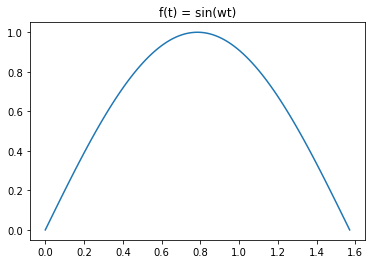

In [287]:
N = 100
w = 2
Tmin = 0
Tmax = Pi/2

f = lambda t: np.sin(w*t)
Tplot = np.linspace(Tmin, Tmax,N+1)
plt.plot(Tplot,f(Tplot))
plt.title("f(t) = sin(wt)")
plt.show()

### Exaktes integral von f(t):
$
\begin{align}
\int f(t) \, dt = - \frac{1}\omega cos(\omega t) + C

\end{align}
$

In [288]:
Iexakt = (-1/w)*(np.cos(w*Tmax) - np.cos(w*Tmin))

print("Wert des exakten Integrals:", Iexakt)

Wert des exakten Integrals: 1.0


### IntegratePolynomial

$
\begin{align}
    \overline{I}(p) = \sum_{i=0}^N \left( p_i \left( \int_a^b t^i \, dt \right) \right)
\end{align}
$

In [289]:
def IntegratePolynomial( p, a, b ):
    result = 0.0
    
    for i in range(len(p)):
        val = p[i] * ( (1/(i+1)) * (b**(i+1) - a**(i+1)))
        result = result + val 
    
    return result

In [290]:
#### Test
p = [ 0, 1, 0, 0, -1 ]  # p(t) = t - t^4
IntegratePolynomial(p, 0,10)

-19950.0

### Berechnung von Koeffizienten $\lambda_i$

In [291]:
# Wie viele Koeffizienten sollen berechnet werden?
Ncoeffs = 9
t = np.linspace(Tmin,Tmax,Ncoeffs+1)
#print("t =", t)
coeffs  = np.zeros([Ncoeffs+1, Ncoeffs+2])
for i in range(0,Ncoeffs+1):
    # i-ter koefizientensatz
    Nc = i
    for j in range(0,Nc+1): # Nc+1:=Anzahl Pkt die einfliessen"
        p = np.zeros([Nc+1])
        p[0] = 1
        #print("i={} j={}".format(i,j))
        for k in range(0,Nc+1):
            if (not j==k):
                # Kopie von vorherigem p abspeichern
                p_old = p.copy()
                #print("p_old =", p_old)
                # Schritt 1: p nach rechts shiften:
                for l in range(Nc,-1,-1):
                    p[l] = p_old[l-1]
                # Ersten Koeffizienten löschen:
                p[0] = 0
                # Schritt 2: Addieren von t_k*p_old:
                p = p - t[k]*(p_old)
                # Schritt 3: Multiplizieren mit 1/(t_j-t_k):
                p = p * (1/(t[j] - t[k]))                       
        # Koeffizient speichern:
        coeffs[i][j] = IntegratePolynomial(p, Tmin, Tmax)    
    #print("coeffs[{}] = {}".format(i,coeffs[i]))
#tosave = {'coeffs':coeffs}
tosave = {'coeffs':coeffs[1:]}
sio.savemat('coeffs.mat', tosave)
print("Saved coeffs:\n", tosave['coeffs'])

Saved coeffs:
 [[ -5.49778714e+00   7.06858347e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.21736715e+01  -2.82743339e+01   1.76714587e+01   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [ -1.66897110e+01   5.83158136e+01  -6.89186888e+01   2.88633825e+01
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.52956292e+01  -6.96255472e+01   1.22993352e+02  -9.90779783e+01
    3.19853402e+01   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [ -9.00262645e+00   5.18657312e+01  -1.19989204e+02   1.43904578e+02
   -8.95059382e+01   2.42982557e+01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  3.40315829e

### Koeffizienten einlesen und ausgeben

In [292]:
loaded_coeffs = sio.loadmat("coeffs.mat")['coeffs']

### Numerische Integration

In [293]:
for i in range(1,Ncoeffs):
    T = np.linspace(Tmin,Tmax,i+1)
    F = f(T)
    st = len(F)
    val = (Tmax-Tmin) * np.sum(F.dot(loaded_coeffs[i][:len(F)]))
    print('Approximation mit {} Stützstellen: {:.5f}, Fehler: {}'.format(st, val, np.abs(Iexakt - val)))

Approximation mit 2 Stützstellen: -0.00000, Fehler: 1.0000000000000053
Approximation mit 3 Stützstellen: 91.60227, Fehler: 90.60226584761055
Approximation mit 4 Stützstellen: 72.59887, Fehler: 71.59886836063794
Approximation mit 5 Stützstellen: 28.96754, Fehler: 27.96754064825714
Approximation mit 6 Stützstellen: 11.39603, Fehler: 10.396029228574221
Approximation mit 7 Stützstellen: 3.68359, Fehler: 2.683585561264778
Approximation mit 8 Stützstellen: 1.48706, Fehler: 0.48705966492476716
Approximation mit 9 Stützstellen: 1.37323, Fehler: 0.3732290126003741


### Grafische Darstellung der Funktion sowie der Stützstellen

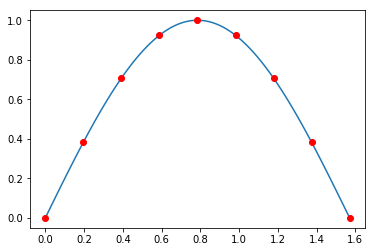

In [294]:
fig, ax = plt.subplots()
n = 100
x = np.linspace(Tmin,Tmax,n)
ax.plot(x,f(x))
ax.plot(T,F,'ro');
plt.show()